# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from random import uniform
from citipy import citipy
from datetime import datetime
import seaborn as sns
import urllib
from urllib.error import HTTPError
from datetime import datetime



# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [138]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat = []
lng = []
cloudiness = []
dt = []
temp = []
humidity = []
wind = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

567

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [139]:
api_key

'9be9daa77944427737375d79428d57be'

In [140]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [141]:
print("Beginning Data Retrival")
print("------------------------------")
i = 1
j = 1
weather_df = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}
for city in cities:
    response = requests.get(query_url + city)
    response_json = response.json()
    
    if response.status_code == 200:
        weather_df["City"].append(city)
        weather_df["Cloudiness"].append(response_json['clouds']['all'])
        weather_df["Country"].append(response_json['sys']['country'])
        weather_df["Date"].append(response_json['dt'])
        weather_df["Humidity"].append(response_json['main']['humidity'])
        weather_df["Lat"].append(response_json['coord']['lat'])
        weather_df["Lng"].append(response_json['coord']['lon'])
        weather_df["Max Temp"].append(response_json['main']['temp_max'])
        weather_df["Wind Speed"].append(response_json['wind']['speed'])
        if j <= 50:
            print(f"Processing Record {j} of Set {i} | {city}")
            j = j + 1 
        else:
            j = 0
            i = i + 1
            print(f"Processing Record {j} of Set {i} | {city}")
            j = j + 1
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | palos heights
City not found. Skipping...
Processing Record 2 of Set 1 | plouzane
City not found. Skipping...
Processing Record 3 of Set 1 | coihaique
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
City not found. Skipping...
Processing Record 5 of Set 1 | saint-joseph
City not found. Skipping...
Processing Record 6 of Set 1 | newport
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 9 of Set 1 | kodiak
City not found. Skipping...
Processing Record 10 of Set 1 | mar del plata
City not found. Skipping...
Processing Record 11 of Set 1 | cabo san lucas
City not found. Skipping...
Processing Record 12 of Set 1 | davidson
City not found. Skipping...
Processing Record 13 of Set 1 | chumikan
City not found. Skipping...
Processing Record 14 of Set 1 | fortun

Processing Record 18 of Set 3 | izumo
City not found. Skipping...
Processing Record 19 of Set 3 | parabel
City not found. Skipping...
Processing Record 20 of Set 3 | bressanone
City not found. Skipping...
Processing Record 21 of Set 3 | alofi
City not found. Skipping...
Processing Record 22 of Set 3 | havre-saint-pierre
City not found. Skipping...
Processing Record 23 of Set 3 | saldanha
City not found. Skipping...
Processing Record 24 of Set 3 | ilulissat
City not found. Skipping...
Processing Record 25 of Set 3 | hofn
City not found. Skipping...
Processing Record 26 of Set 3 | biltine
City not found. Skipping...
Processing Record 27 of Set 3 | auki
City not found. Skipping...
Processing Record 28 of Set 3 | rio gallegos
City not found. Skipping...
Processing Record 29 of Set 3 | cherskiy
City not found. Skipping...
Processing Record 30 of Set 3 | chuy
City not found. Skipping...
Processing Record 31 of Set 3 | zhezkazgan
City not found. Skipping...
Processing Record 32 of Set 3 | kha

Processing Record 35 of Set 5 | sorland
City not found. Skipping...
Processing Record 36 of Set 5 | srednekolymsk
City not found. Skipping...
Processing Record 37 of Set 5 | yamasaki
City not found. Skipping...
Processing Record 38 of Set 5 | cardston
City not found. Skipping...
Processing Record 39 of Set 5 | jumla
City not found. Skipping...
Processing Record 40 of Set 5 | souillac
City not found. Skipping...
Processing Record 41 of Set 5 | miandrivazo
City not found. Skipping...
Processing Record 42 of Set 5 | honiara
City not found. Skipping...
Processing Record 43 of Set 5 | dingle
City not found. Skipping...
Processing Record 44 of Set 5 | topeka
City not found. Skipping...
Processing Record 45 of Set 5 | barentu
City not found. Skipping...
Processing Record 46 of Set 5 | bambous virieux
City not found. Skipping...
Processing Record 47 of Set 5 | pacifica
City not found. Skipping...
Processing Record 48 of Set 5 | phan thiet
City not found. Skipping...
Processing Record 49 of Set

Processing Record 2 of Set 8 | kavaratti
City not found. Skipping...
Processing Record 3 of Set 8 | lamar
City not found. Skipping...
Processing Record 4 of Set 8 | pangody
City not found. Skipping...
Processing Record 5 of Set 8 | broome
City not found. Skipping...
Processing Record 6 of Set 8 | ambulu
City not found. Skipping...
Processing Record 7 of Set 8 | ilorin
City not found. Skipping...
Processing Record 8 of Set 8 | sapouy
City not found. Skipping...
Processing Record 9 of Set 8 | muli
City not found. Skipping...
Processing Record 10 of Set 8 | westport
City not found. Skipping...
Processing Record 11 of Set 8 | komsomolskiy
City not found. Skipping...
Processing Record 12 of Set 8 | perth
City not found. Skipping...
Processing Record 13 of Set 8 | san patricio
City not found. Skipping...
Processing Record 14 of Set 8 | coahuayana
City not found. Skipping...
Processing Record 15 of Set 8 | tamale
City not found. Skipping...
Processing Record 16 of Set 8 | zalantun
City not fo

Processing Record 21 of Set 10 | carahue
City not found. Skipping...
Processing Record 22 of Set 10 | magistralnyy
City not found. Skipping...
Processing Record 23 of Set 10 | hualahuises
City not found. Skipping...
Processing Record 24 of Set 10 | izyum
City not found. Skipping...
Processing Record 25 of Set 10 | teguise
City not found. Skipping...
Processing Record 26 of Set 10 | abalak
City not found. Skipping...
Processing Record 27 of Set 10 | sinnamary
City not found. Skipping...
Processing Record 28 of Set 10 | komatipoort
City not found. Skipping...
Processing Record 29 of Set 10 | severnyy-kospashskiy
City not found. Skipping...
Processing Record 30 of Set 10 | el zulia
City not found. Skipping...
Processing Record 31 of Set 10 | whitehaven
City not found. Skipping...
Processing Record 32 of Set 10 | ixtapa
City not found. Skipping...
Processing Record 33 of Set 10 | araouane
City not found. Skipping...
Processing Record 34 of Set 10 | bay roberts
City not found. Skipping...
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [149]:
weather_df = pd.DataFrame(weather_df)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,palos heights,1,US,1557011421,39,41.67,-87.80,66.99,8.05
1,plouzane,0,FR,1557011287,80,48.38,-4.62,48.00,3.36
2,coihaique,40,CL,1557007200,81,-45.58,-72.07,46.40,8.05
3,rikitea,73,PF,1557011423,86,-23.12,-134.97,77.96,17.31
4,saint-joseph,0,FR,1557011128,36,43.56,6.97,60.80,16.11


In [150]:
weather_df.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

In [151]:
# convert data to csv
weather_df.to_csv('weather_df.csv', encoding='utf-8', index=False)

In [152]:
weather_df.shape

(521, 9)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

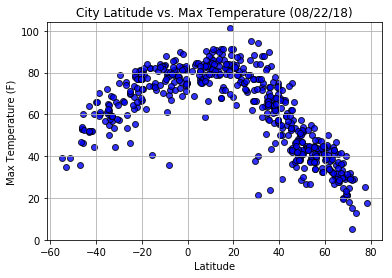

In [153]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,104)
plt.grid(True)

plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

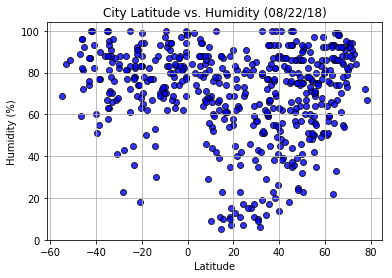

In [147]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,104)
plt.grid(True)

plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

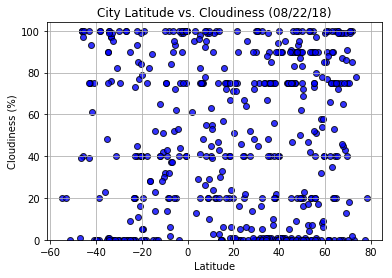

In [154]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,104)
plt.grid(True)

plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,38)
plt.grid(True)

plt.savefig("LatVsWindSpeed.png")
plt.show()